In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001
dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

In [3]:
#model
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), # optimization
             loss='categorical_crossentropy', # loss function
             metrics=['accuracy']) # metrics / accuracy

In [12]:
# Data preprocess

train_paths = sorted(glob('dataset/cifar/train/*.png'))
test_paths = sorted(glob('dataset/cifar/test/*.png'))

In [13]:
train_paths[:10]

['dataset/cifar/train/0_frog.png',
 'dataset/cifar/train/10000_automobile.png',
 'dataset/cifar/train/10001_frog.png',
 'dataset/cifar/train/10002_frog.png',
 'dataset/cifar/train/10003_ship.png',
 'dataset/cifar/train/10004_ship.png',
 'dataset/cifar/train/10005_cat.png',
 'dataset/cifar/train/10006_deer.png',
 'dataset/cifar/train/10007_frog.png',
 'dataset/cifar/train/10008_airplane.png']

In [14]:
test_paths[:10]

['dataset/cifar/test/0_cat.png',
 'dataset/cifar/test/1000_dog.png',
 'dataset/cifar/test/1001_airplane.png',
 'dataset/cifar/test/1002_ship.png',
 'dataset/cifar/test/1003_deer.png',
 'dataset/cifar/test/1004_ship.png',
 'dataset/cifar/test/1005_automobile.png',
 'dataset/cifar/test/1006_automobile.png',
 'dataset/cifar/test/1007_ship.png',
 'dataset/cifar/test/1008_truck.png']

In [15]:
path = train_paths[0]
path

'dataset/cifar/train/0_frog.png'

In [17]:
def get_class_name(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    return lbl_name

In [18]:
path, get_class_name(path)

('dataset/cifar/train/0_frog.png',
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>)

In [19]:
class_names = [get_class_name(path) for path in train_paths]
class_names[:10]

[<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'ship'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'ship'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'cat'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'deer'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'airplane'>]

In [25]:
classes = tf.unique(class_names).y.numpy()
# np.unique(class_names) 에러

classes

array([b'frog', b'automobile', b'ship', b'cat', b'deer', b'airplane',
       b'truck', b'dog', b'bird', b'horse'], dtype=object)

In [26]:
classes == get_class_name(path)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True, False, False, False, False, False, False, False, False,
       False])>

In [28]:
def onehot_encoding(label_name):
    classes == get_class_name(path)
    onehot_encoding = tf.cast(classes == get_class_name(path), tf.uint8)
    return onehot_encoding

In [51]:
def read_dataset(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    image = tf.cast(image, tf.float32) / 255.
    
    # read label
    class_name = get_class_name(path)
    label = onehot_encoding(class_name)
    return image, label

In [32]:
image, label = read_dataset(path)
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [40]:
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [41]:
transformed, label = image_preprocess(image, label)

In [42]:
transformed.shape

TensorShape([32, 32, 3])

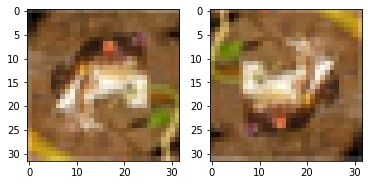

In [45]:
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(transformed)
plt.show()

In [ ]:
# 정리

In [ ]:
class_names = [get_class_name(path) for path in train_paths]
classes = tf.unique(class_names).y.numpy()

def get_class_name(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    return lbl_name


def onehot_encoding(label_name):
    classes == get_class_name(path)
    onehot_encoding = tf.cast(classes == get_class_name(path), tf.uint8)
    return onehot_encoding

In [ ]:
def read_dataset(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    image = tf.cast(image, tf.float32) / 255.
    
    # read label
    class_name = get_class_name(path)
    label = onehot_encoding(class_name)
    return image, label

In [ ]:
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [52]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.map(image_preprocess)  # transform images
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [54]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=len(test_paths))
test_dataset = test_dataset.repeat()

In [55]:
# Training

steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(test_paths) // batch_size

model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=num_epochs
)

/Users/sengjeawang/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1562/1562 [==============================] - 123s 68ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1562/1562 [==============================] - 104s 67ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1562/1562 [==============================] - 103s 66ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1562/1562 [==============================] - 106s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1562/1562 [==============================] - 106s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1562/1562 [==============================] - 107s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1562/1562 [==============================] - 107s 68ms/step - l

KeyboardInterrupt: 